In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 4, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
selected_variants_file = "../data/variably_expressive/gene_variants.csv"

In [3]:
df = pd.read_csv(selected_variants_file, dtype=str)

In [4]:
def get_variant_loc_obesity_info(df):
    pivot_df = df.pivot_table(index="variant_id", values=["SYMBOL", "Mut_type", "obesity_type", "Sample"], aggfunc=lambda x: ",".join(np.unique(x)))
    pivot_df["obesity_ntypes"] = pivot_df.obesity_type.map(lambda x: len(x.split(",")))
    return pivot_df

In [5]:
vloc_df = get_variant_loc_obesity_info(df)

In [6]:
def create_mut_loc_table_helper(df, name):
    df = df.reset_index().pivot_table(index="SYMBOL", values=["variant_id", "Sample"], aggfunc={
    "variant_id": lambda x: len(set(x)),
    "Sample": lambda x: len(set(sum([i.split(",") for i in x], [])))})
    df = df.reset_index()
    df["obesity_type"] =  name
    return df.loc[:, ["SYMBOL", "variant_id", "Sample", "obesity_type"]]


def create_mut_loc_table(dfs, names):
    df = pd.concat([create_mut_loc_table_helper(x,y) for x,y in zip(dfs,names)], axis=0)
    return df.reset_index(drop=True).pivot_table(index="SYMBOL", values=["variant_id", "Sample"], columns=["obesity_type"]).fillna(0.)



In [7]:
risk_only = vloc_df.loc[vloc_df.obesity_type=="risk"]
protection_only = vloc_df.loc[vloc_df.obesity_type=="protection"]
both = vloc_df.loc[vloc_df.obesity_ntypes>1]

In [8]:
df = create_mut_loc_table([risk_only, protection_only, both], ["risk_only", "protection_only", "both"])

<AxesSubplot:xlabel='obesity_type', ylabel='SYMBOL'>

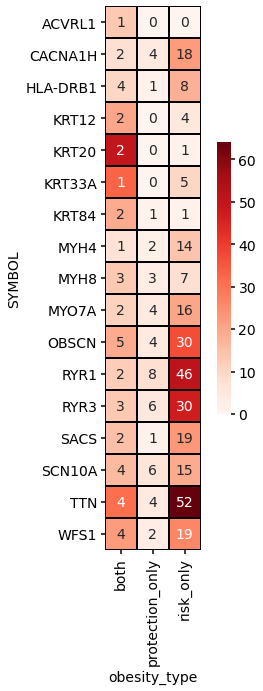

In [9]:
fig, ax = plt.subplots(figsize=(6, 10))
sns.heatmap(data=df.Sample, annot=df.variant_id, cmap="Reds", square=True, ax=ax, cbar_kws={"shrink": 0.5}, linewidths=1.5, linecolor="k")